In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.4 MB/s eta 0:00:00


In [2]:
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3567 sha256=b6218d798e18c27b436891ab47a35e5004d227d2a81fdd6469ec5a34e656cac6
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [3]:
!pip install tensorflow

In [4]:
!pip install qiskit_algorithms

In [5]:
import numpy as np
import pandas as pd
import requests
import json
import tensorflow as tf
import qiskit_algorithms
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from qiskit import QuantumCircuit
from qiskit.circuit.library import PauliFeatureMap
from qiskit_algorithms.optimizers import ADAM
from qiskit.circuit import Parameter
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms import VQR

In [6]:
api_url = "https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?apikey=dbe3f834f777ed8907196e8eafbb4bda"

# Make a GET request to the API
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the response JSON
    data = response.json()
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")

df = pd.json_normalize(data, 'historical', ['symbol']) #dataframe conversion
df.tail()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
1253,2019-08-14,50.79,51.61,50.65,50.69,49.10,146189772,146189772,-0.1025,-0.19689,50.9350,"August 14, 19",-0.001969,AAPL
1254,2019-08-13,50.26,53.04,50.21,52.24,50.61,190159144,190159144,1.9900,3.94000,51.4375,"August 13, 19",0.039400,AAPL
1255,2019-08-12,49.91,50.51,49.79,50.12,48.55,89927556,89927556,0.2150,0.42076,50.0825,"August 12, 19",0.004208,AAPL
1256,2019-08-09,50.33,50.69,49.82,50.25,48.68,98478984,98478984,-0.0775,-0.15895,50.2725,"August 09, 19",-0.001589,AAPL
1257,2019-08-08,50.05,50.88,49.85,50.86,49.08,108038092,108038092,0.8075,1.62000,50.4100,"August 08, 19",0.016200,AAPL


In [7]:
final_data = df[['open', 'date']][0:500] #forming filtered dataframe
input_sequences = []
labels = []

#Creating input and output data for time series forecasting
for i in range(len(final_data['open'])):
    if i > 1:
        labels.append(final_data['open'][i])
        input_sequences.append(final_data['open'][i-2:i+1].tolist())

#creating train test split
x_train = np.array(input_sequences[0:400])
x_test = np.array(input_sequences[400:])
y_train = np.array(labels[0:400])
y_test = np.array(labels[400:])

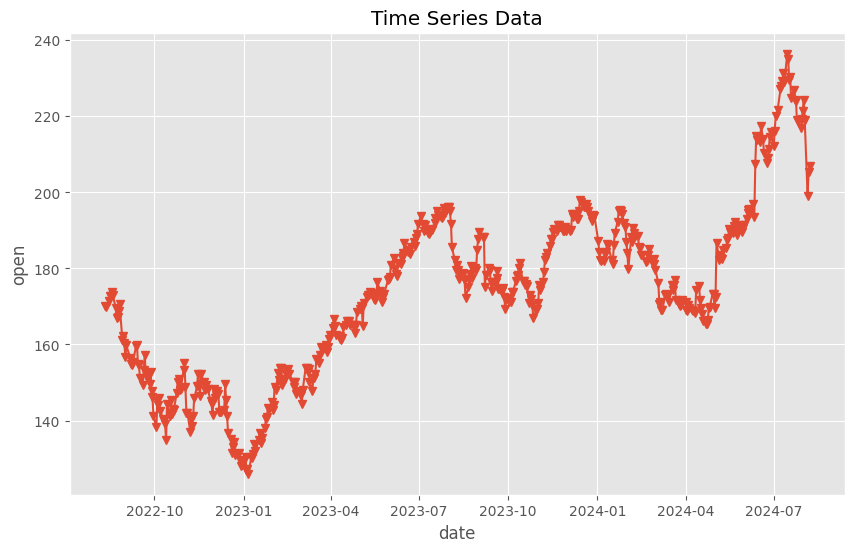

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['date'][0:500], df['open'][0:500], marker='v', linestyle='-')

# Adding labels and title
plt.xlabel('date')
plt.ylabel('open')
plt.title('Time Series Data')

# Display the plot
plt.grid(True)
plt.show()

In [9]:
  num_features =  3
  feature_map = PauliFeatureMap(feature_dimension = num_features, reps = 2)
  optimizer = ADAM(maxiter = 1)

In [10]:
def ans(n, depth):
    qc = QuantumCircuit(n)
    for j in range(depth):
        for i in range(n):
            param_name = f'theta_{j}_{i}'
            theta_param = Parameter(param_name)
            qc.rx(theta_param, i)
            qc.ry(theta_param, i)
            qc.rz(theta_param, i)
    for i in range(n):
        if i == n-1:
            qc.cx(i, 0)
        else:
            qc.cx(i, i+1)
    return qc

In [11]:
ansatz = ans(num_features, 5) #anstaz(num_qubits=num_features, reps=5)

#creating train test split
x_train = np.array(input_sequences[0:400])
x_test = np.array(input_sequences[400:])
y_train = np.array(labels[0:400])
y_test = np.array(labels[400:])

In [12]:
vqr = VQR(
    feature_map = feature_map,
    ansatz = ansatz,
    optimizer = optimizer,
)

vqr.fit(x_train,y_train)
vqr_mse = mean_squared_error(y_test, vqr.predict(x_test))

# Calculate root mean squared error
vqr_rmse = np.sqrt(vqr_mse)
print(f"Root Mean Squared Error (RMSE): {vqr_rmse}")

Root Mean Squared Error (RMSE): 149.5272437562063
